# <span style="color:RoyalBlue">Visualización de Datos</span>

Python cuanta con un rico conjunto de bibliotecas para la visualización gráfica y científica. 

En esta materia esa capacidad es de gran utilidad tanto en la fase de **comprensión de datos**, particularmente para realizar un análisis exploratorio de datos, y para la **presentación de resultados**. 

En todo momento es útil tener presente qué característica de los datos se desea resaltar. No se trata de crear un *collage* de datos sino de **transmitir una idea** o un resultado de forma visual para que sea fácilmente interpretable.

Algunas de las bibliotecas de visualización más usadas son:

* **Matplotlib**
* **Seaborn**
* Bokeh
* ggplot
* Plotly
* Geoplotlib
* ...


Nos focalizaremos en el uso de **Maplotlib** y **Seaborn**.


Se puede indagar más sobre ellas [aqui](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/).


## <span style="color:CornflowerBlue">MatplotLib</span>

[Matplotlib](https://matplotlib.org/) (**Mat**-h **Plot** **Lib**rary) es la libreria estándar de Python para realizar diferentes tipos de gráficos. Tiene una sintaxis similar a las funciones de graficación de Matlab.

<img src="https://matplotlib.org/_static/logo2.png" width= 500>


Veamos un ejemplo simple de graficación de una función cuadrática

In [5]:
# Para importar la librería usamos
import matplotlib.pyplot as plt

In [6]:
# Preparamos la biblioteca para incrustar las gráficas en el documento (sinó hay que llamar siempre a la función plt.show())
%matplotlib inline

In [17]:
# Importamos el restos de las librerías
import numpy as np

# Generar los datos
x = np.linspace(0, 10, 1000)
y = np.square(x)

Text(0, 0.5, 'y')

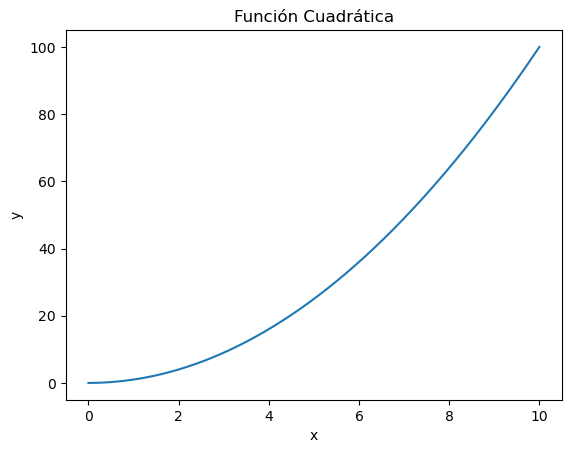

In [20]:
# Graficamos
plt.plot(x,y)

# Colocamos título y etiqueta en los ejes
plt.title("Función Cuadrática")
plt.xlabel('x')
plt.ylabel('y')

### Configuración de gráficos

Veamos un segundo ejemplo con algunos atributos adicionales en los gráficos

Text(0.5, 1.0, 'Función Seno vs. Función Coseno')

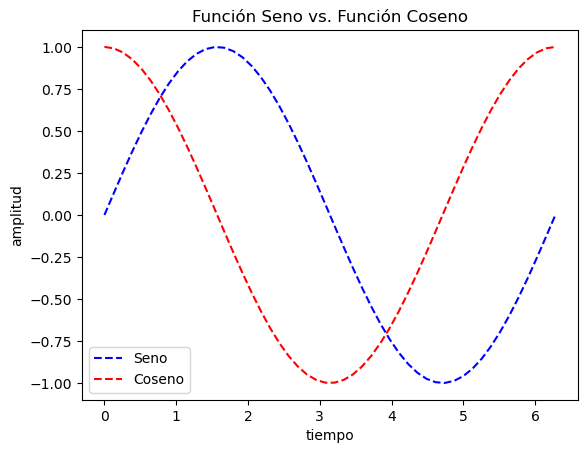

In [50]:
# Importamos librerías (si ya estaban importadas no sería necesario)
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc

x = np.linspace(0, 2 * np.pi, 50)  # eje x
y1 = np.sin(x)  # función seno
y2 = np.cos(x)  # función coseno

plt.plot(x, y1, 'b--', label='Seno')   # líneas punteadas azul
plt.plot(x, y2, 'r--', label='Coseno') # líneas punteadas rojas
plt.legend()  # mostrar las referencias

plt.xlabel('tiempo')  # etiqueta del eje x
plt.ylabel('amplitud')  # etiqueta del eje y
plt.title("Función Seno vs. Función Coseno")  # título

Estas mismas funciones podemos graficarlas en paneles con múltiples gráficos

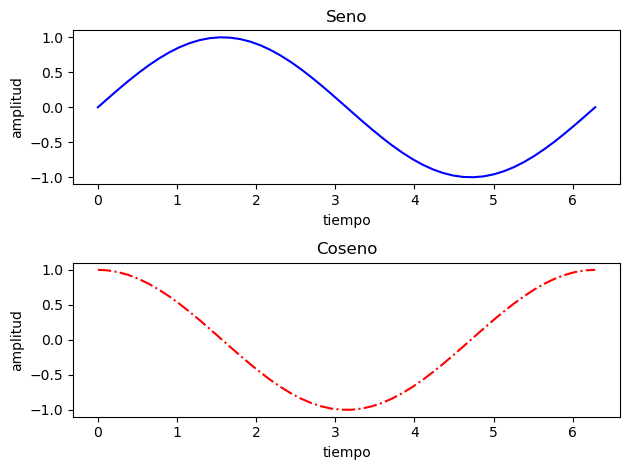

In [51]:
# Creamos un panel (subplot) con 2 filas y 1 columna
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, posición 1
plt.plot(x, y1, 'b-')  # grafica función seno
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.title('Seno')

plt.subplot(2, 1, 2)  # 2 filas, 1 columna, posición 2
plt.plot(x, y2, 'r-.') # grafica función coseno
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.title('Coseno')

plt.tight_layout()     # Ajustar espaciado entre subplots

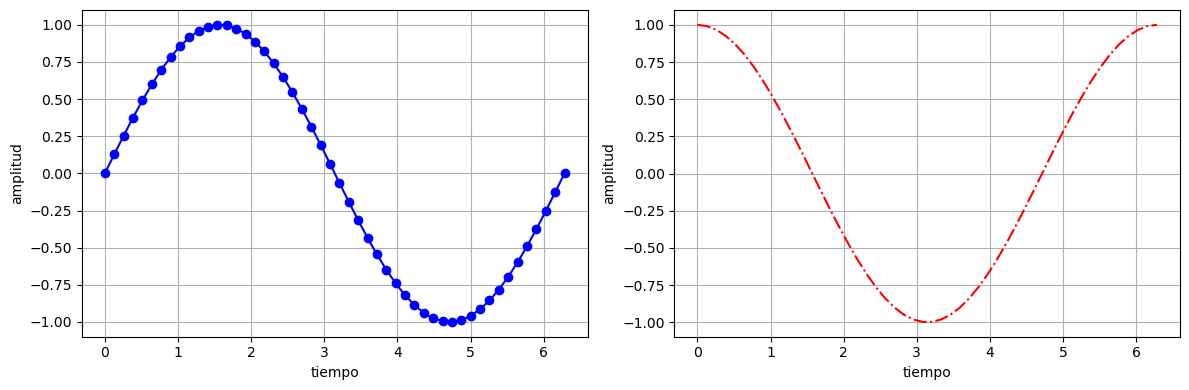

In [54]:
# Configuramos el tamaño del gráfico (en pulgadas)
plt.figure(figsize=(12, 4))  

# Ahora graficamos 1 fila y 2 columns
plt.subplot(1, 2, 1)   # 1 fila, 2 columnas, posición 1
plt.plot(x, y1, 'b-o')  # graficamos función y1
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.grid(True)  # grilla en el gráfico

plt.subplot(1, 2, 2)   # 1 fila, 2 columnas, posición 2
plt.plot(x, y2, 'r-.') # graficamos función y2
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.grid(True)  # grilla en el gráfico

plt.tight_layout()     # Ajustar espaciado entre subplots

Otros parámetros y configuraciones:
- `plt.figure( figsize = (w, h) )` seleccionar el tamaño de la figura
- `plt.subplots(nrows, ncols)` crear un conjunto de subplots para usarlos posteriormente
- `plt.axis([xmin, xmax, ymin, ymax])` selección de límites de graficación de los ejes
- `plt.grid()` inserción de una grilla cuadriculada

Se pueden configurar muchísimos más parámetros, que se pueden ver en la documentación de [matplotlib.pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html).

### Gráficos de Dispersión *(Scatter Plots)*

Estos gráficos permiten visualizar si existe algún tipo de tendencias o correlaciones entre variables.

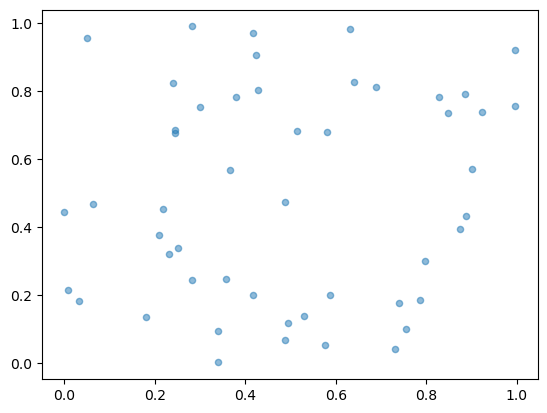

In [60]:
# Ejemplo 1

import numpy as np
import matplotlib.pyplot as plt

N = 50                              # Número de puntos a graficar
x = np.random.rand(N)               # Definición de variables
y = np.random.rand(N)

plt.scatter(x, y, s=20, alpha=0.5)

En el ejemplo anterior se utilizaron como parámetro de graficación el área de cada punto, el color y su transparencia (*alpha*). Se puede pensar en hacer estas gráficas seleccionando colores diferenntes para cada clase a visualizar.

En el siguiente ejemplo se generan datos correlacionados a partir de variables que tienen una distribución normal.

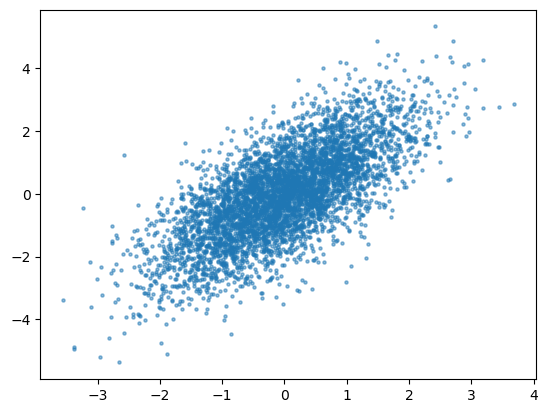

In [65]:
# Ejemplo 2

import matplotlib.pyplot as plt
import numpy as np

mu = [0, 0]                          # Valores medios de x e y
cxy = [[1, 1], [1, 2]]               # Matriz de covarianza, [[Cxx, Cxy], [Cyx, Cyy]]
x, y = np.random.multivariate_normal(mu, cxy, 5000).T

plt.scatter(x, y, s=5, alpha=0.5)
plt.show()

En esa gráfica se puede ver que las variables están correlacionadas (viendo la forma de elipse que se genera en el gráfico). Se puede aumentar o disminuir esas correlaciones modificando la matriz de covarianzas:
- $C_{ij}$ denota la correlación de $i$ respecto de $j$.
- $C_{ii}$ denota la autocorrelación de la variable aleatoria $i$, y es semejante a la varianza de $i$.

### Histogramas

Los histogramas son una de las representaciones más usadas para visualizar distribuciones de una variable.
Para hacer un histograma en matplotlib se usa la función:

> plt.**hist**(x, bins, propiedades)

- **x**: secuencia de datos
- **bins**: número de separaciones de igual ancho
- **propiedades**: opcional

Veamos un ejemplo:

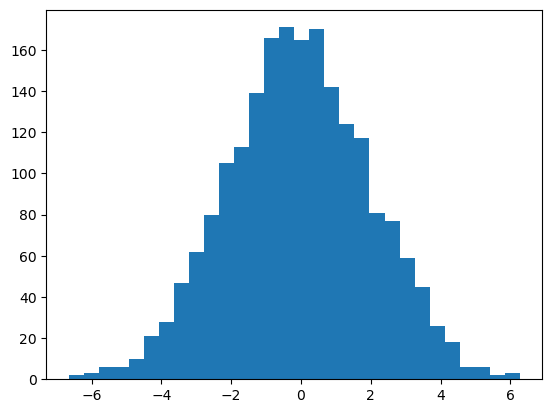

In [66]:
#Ejemplo 1

import matplotlib.pyplot as plt
import numpy as np

rand = np.random.normal(0,2,2000) # Se sintetizan valores aleatorios con distribución normal, media 0 y desvío estandar 2
plt.hist(rand,30)                 # Crea un histograma con 30 bins o rangos
plt.show()

Se puede usar el parametro densit=True para hacer que se normalice el histograma: la suma de todas las columnas será igual a 1.

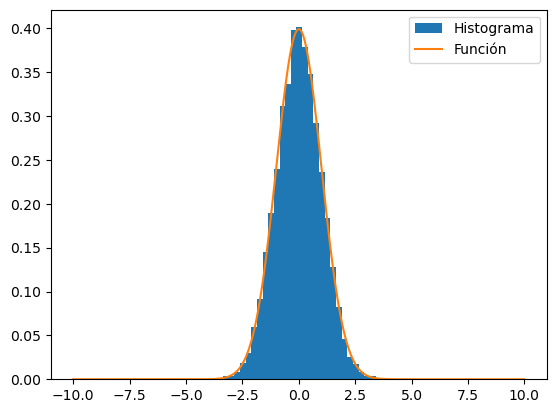

In [67]:
# Ejemplo 2

import matplotlib.pyplot as plt
import numpy as np

mu = 0              # Media de la distribución
sigma = 1           # Desvio estandar
var = sigma**2
t = np.arange(-10,10,0.01)
y = 1/np.sqrt(2*np.pi)*sigma*np.exp(-(t-mu)**2/(2*sigma**2))
rand = np.random.normal(mu,var,10000)

plt.hist(rand,30,density=True, label= "Histograma")
plt.plot(t,y, label= "Función")
plt.legend() 
plt.show()

### Box Plots

Este tipo de gráficos son otra alternativas para visualizar las distribuciones de los datos bajo estudio. Son principalmente usados cuando la distribución de los datos no es normal.

La gráfica muestra permite ver algunos indicadores estadísticos de la distribución como es muestra a continuación:

<img src="../images/boxplot.png" width= 600>


Donde el valor central de la caja marcada con una línea corresponde a la mediana (medida para la cual la mitad de los datos son menores y la otra mitad mayores), el largo de la caja es el rango intercuartil (RIC) que contiene al cincuenta por ciento de los datos, las líneas de punto se llaman vigotes y las líneas en las que finalizan los vigotes son los valores máximos y mínimos si se excluyen los datos atípicos o *outliers*.

Para hacer un boxplot en matplotlib se usa la función:

> plt.**boxplot**(x, bins, propiedades)

- **x**: secuencia de datos
- **bins**: número de separaciones de igual ancho
- **propiedades**: opcional

Veamos un ejemplo:

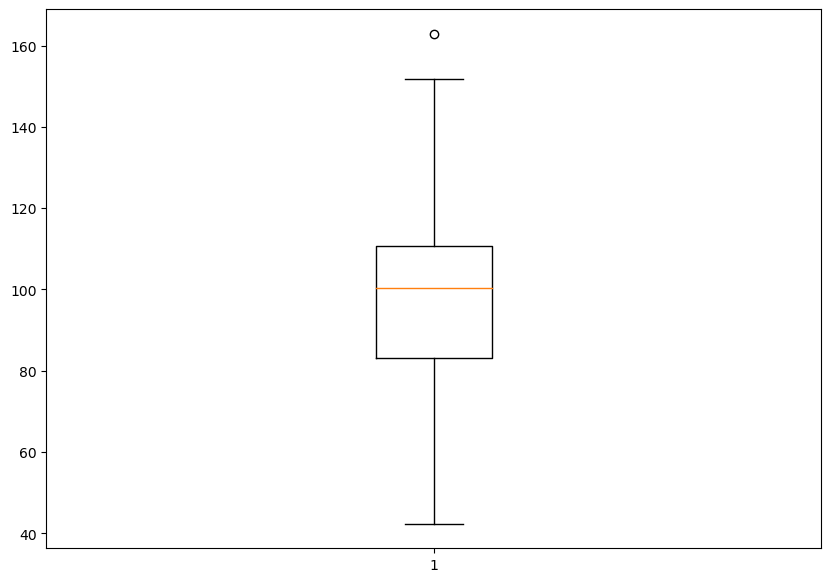

In [68]:
# Ejemplo 1

data = np.random.normal(100, 20, 200) # Valores aleatorios, distribución normal, media 100, desvío estándar 20 
 
plt.figure(figsize =(10, 7))    # Definición del tamaño de canvas de la figura
plt.boxplot(data)                     # Generación de la gráfica
plt.show()

Estos gráficos son muy útiles para comparar distribuciones entre diferentes conjuntos de datos.

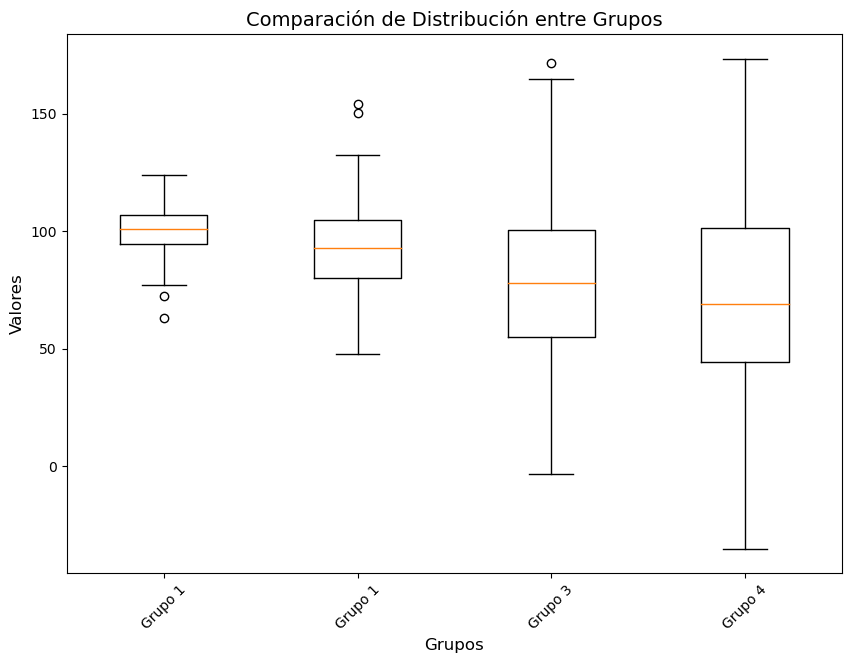

In [77]:
# Ejemplo 2

import matplotlib.pyplot as plt
import numpy as np
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]

# Creamos el gráfico
plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.xticks([1, 2, 3, 4], ["Grupo 1", "Grupo 1", "Grupo 3", "Grupo 4"], rotation=45, fontsize=10)
plt.xlabel('Grupos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Comparación de Distribución entre Grupos', fontsize=14)
plt.show()

## Guardado de gráficos

Todos los gráficos vistos se pueden guardar como PNG o JPG usando la siguiente función:

    plt.savefig(nombre del archivo)

Es muy imporante que se guarden los gráficos antes del comando plt.show() ya que con ese comando matplotlib envía el gráfico a la pantalla y el canvas de graficación se limpia para hacer otro gráfico.

Se puede especificar la resolución de almacenamiento mediante un valor de puntos por pulgada (*dpi*):

    plt.savefig('plot.png', dpi=500)



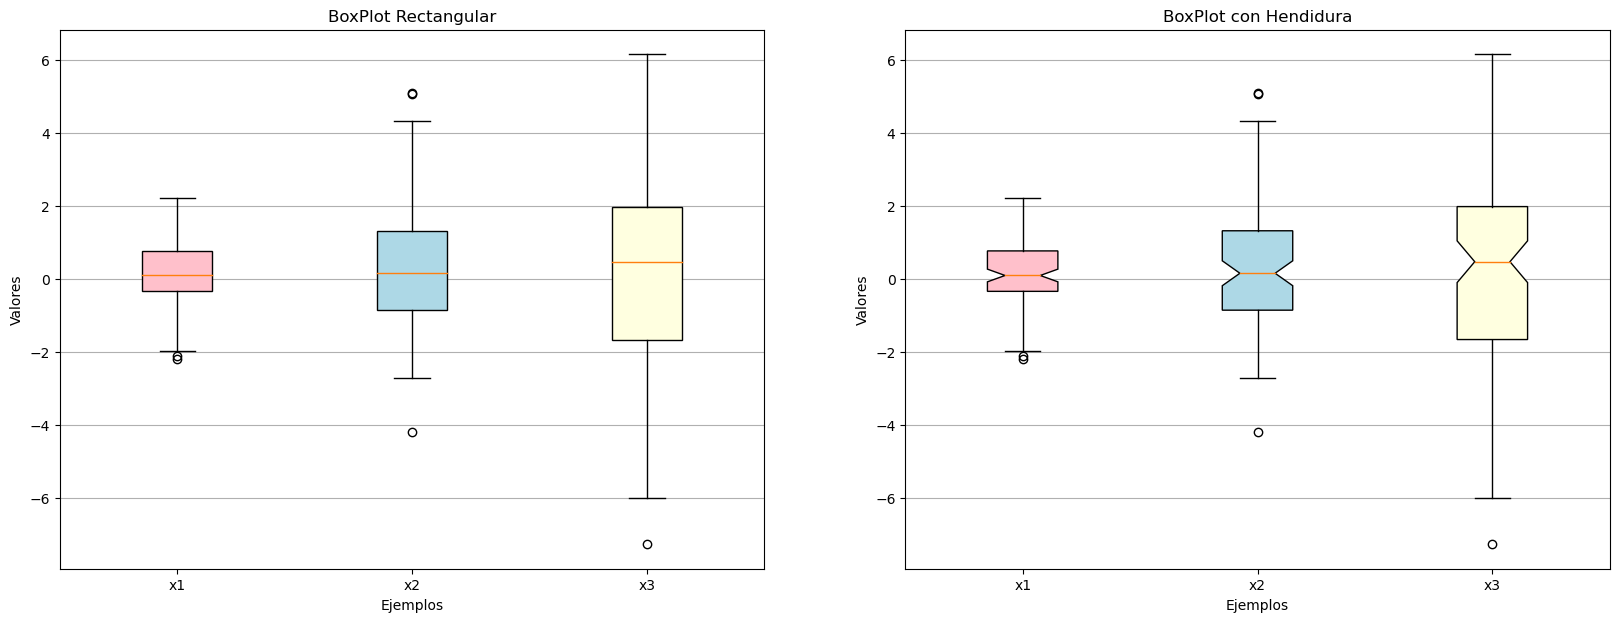

<Figure size 640x480 with 0 Axes>

In [81]:
# Ejemplo

import matplotlib.pyplot as plt
import numpy as np

all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# boxplots rectangulares
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # alineación vertical entre cajas
                     patch_artist=True,  # llenar con color
                     labels=labels)
ax1.set_title('BoxPlot Rectangular')

# boxplots con una hendidura
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # usae formato de caja con hendidura (notch)
                     vert=True,
                     patch_artist=True,
                     labels=labels)
ax2.set_title('BoxPlot con Hendidura')

# rellenado de color
colors = ['pink', 'lightblue', 'lightyellow']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# inserción de grilla horizontal
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Ejemplos')
    ax.set_ylabel('Valores')

# grabado de boxplot antes de plt.show()
plt.savefig('./images/boxplots_antes.png', dpi=150)

plt.show()

# grabado de boxplot después de plt.show()
plt.savefig('./images/boxplots_despues.png', dpi=150)

## <span style="color:CornflowerBlue">Seaborn</span>

[Seaborn](https://seaborn.pydata.org/) es una biblioteca para visualización de datos basada en **Matplotlib** y que se integra facilmente a las estructuras de **Pandas**.

<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" width= 500>


Seaborn tiene muchas rutinas de graficación propias pero también puede sobreescribir los parámetros por defecto de Matplotlib para mejorar el aspecto gráfico.

Para importar la librería usamos:

In [82]:
import seaborn as sns

## Histogramas

Creamos un conjunto de datos en un DataFrame

In [92]:
# Ejemplo 1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Crea datos
datos = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
datos = pd.DataFrame(datos, columns=['x', 'y'])
datos

,x,y
0,1.211191,-0.119268
1,-2.465642,1.358182
2,4.712478,0.338398
3,-1.745882,-0.704423
4,0.369962,0.046679
...,...,...
1995,1.260186,0.080263
1996,3.436576,1.388461
1997,1.914342,1.046643
1998,-0.019152,0.255044


Veremos cómo se puede graficar dos histogramas correspondientes a variables diferentes para poder compararlos:

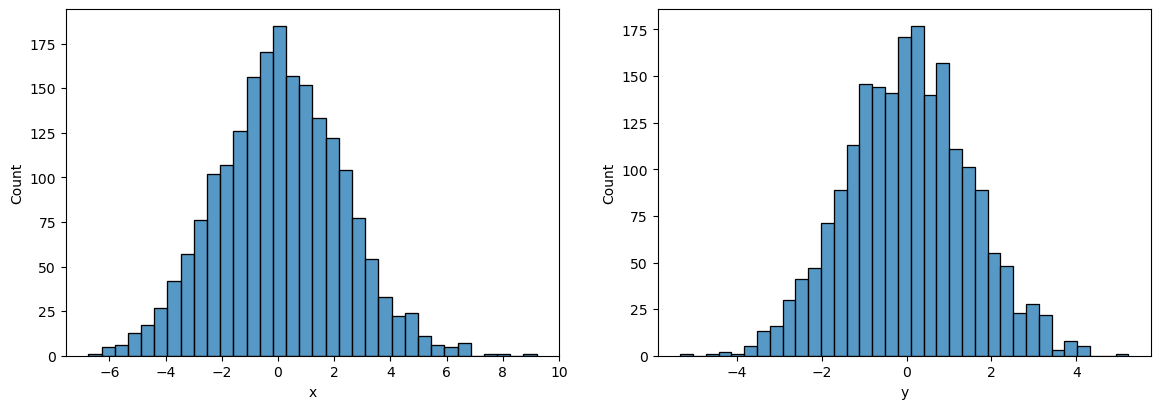

In [115]:
plt.figure(figsize=(14, 4.5))
plt.subplot(1,2,1)

# Histograma para x
sns.histplot(datos['x'])

plt.subplot(1,2,2)

# Histograma para y
sns.histplot(datos['y'])

plt.show()

O bien lo podemos hacer más sencillo

<Axes: ylabel='Count'>

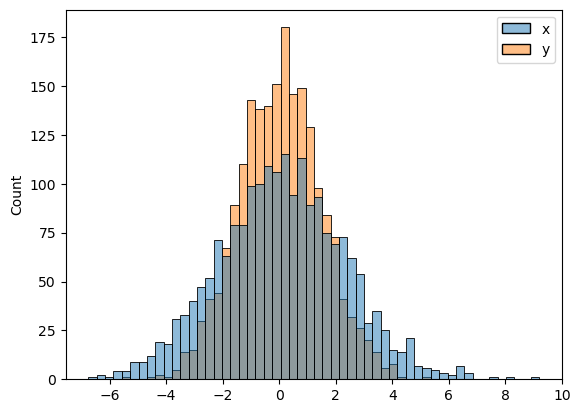

In [117]:
sns.histplot(datos)

Otra opción es graficar las líneas de suavizado de para obtener una estimación de las distribuciones usando una estimación de densidad de kernel (KDE)

<Axes: ylabel='Count'>

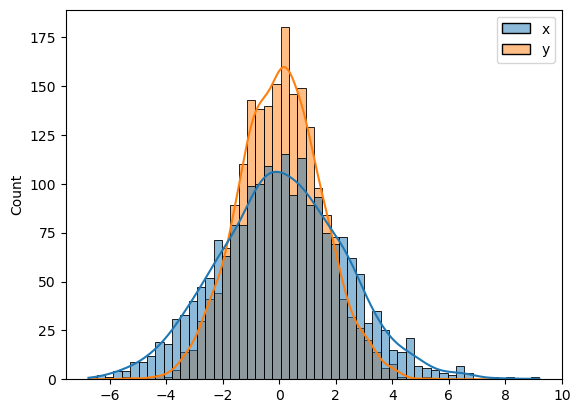

In [119]:
sns.histplot(datos, kde=True)

Es posible obtener cortes seccionales de la distribución conjunta de las dos variables, como así también de las individuales

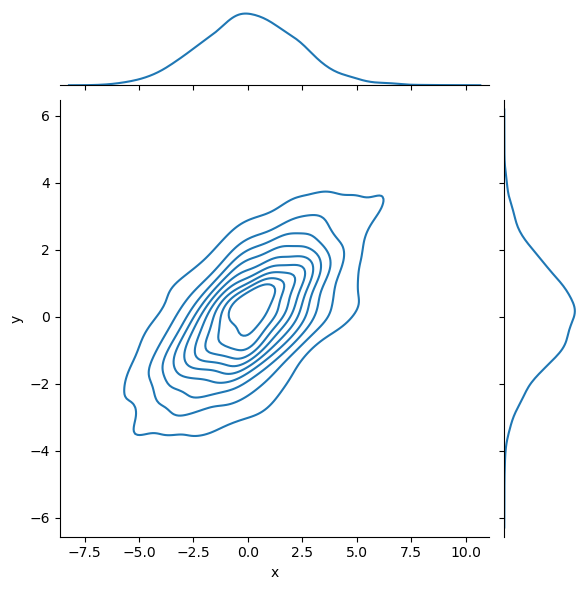

In [123]:
sns.jointplot(data=datos, x="x", y="y", kind="kde")

O también lo podemos ver a través de un scatter plot junto a cada distribución

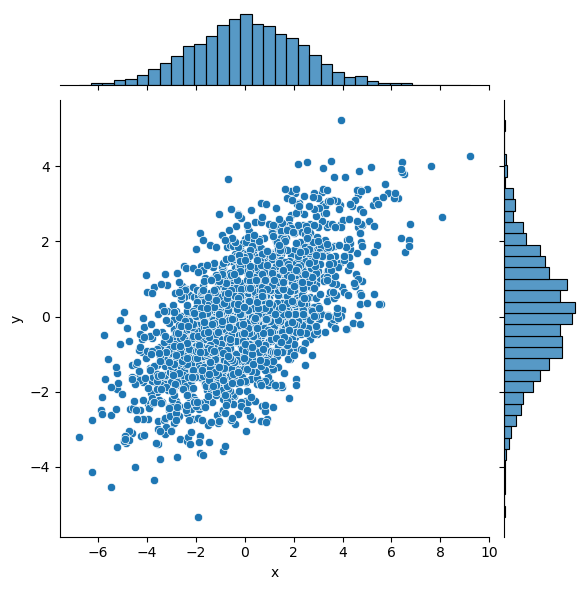

In [125]:
sns.jointplot(data=datos, x="x", y="y", kind="scatter");

## Visualización por grupos

Algo muy útil al hacer análisis exploratorio de datos es realizar gráficos comparativos agrupando de acuerdo de alguna variable de interés.

### Gráfico de a Pares *(Pair Plots)*
Es un tipo de gráfico que permite analizar el comportamiento entre pares de variables.
Tiene una forma de matriz en la que la diagonal presenta el histograma de la variable correspondiente y en las demás celdas gráficos de dispersión entre un par de variables diferentes.

In [140]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


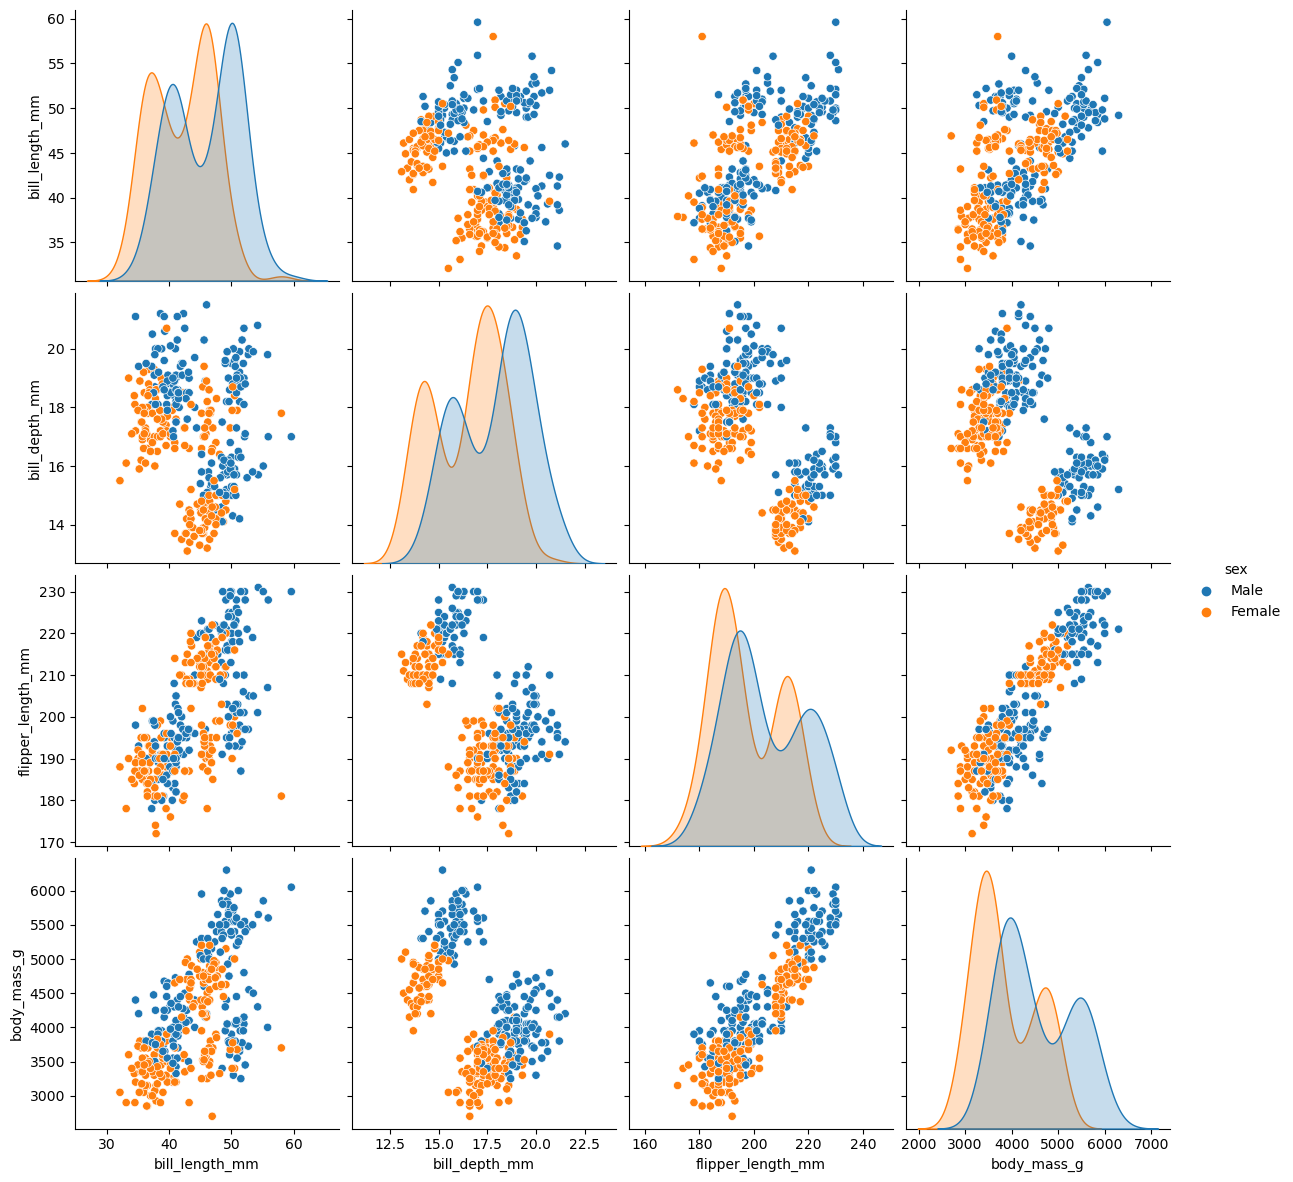

In [141]:
# Muestra el gráfico de pares para cada variable usando el sexo como variable de contraste (agrupamiento)
sns.pairplot(penguins, hue='sex', height=3) 

### Probemos con otros gráficos: Box Plot

Carguemos el dataset con las Notas que usamos la clase anterior.

In [142]:
df = pd.read_excel('datos/notas.xlsx')
df.head()

,Año,Curso,Id,1P,1P_R1,1P_R2,2P,2P_R1,2P_R2,Condicion,Modalidad
0,2015,A,LTTH85032132739198,7.0,NaN,NaN,2.0,NaN,5.0,Regular,P
1,2015,A,TCJT10556844934684,NaN,NaN,NaN,NaN,NaN,NaN,Libre,P
2,2015,A,EUWN85586540996763,5.0,NaN,NaN,2.0,10.0,NaN,Regular,P
3,2015,A,YUCI63927275845802,NaN,NaN,NaN,NaN,NaN,NaN,Libre,P
4,2015,A,XOIM06427265655771,6.0,NaN,NaN,2.0,2.0,4.0,Regular,P


Vamos a hacer un boxplot para conocer la distribución de las notas del 1º Parcial de acuerdo a la variable de agrupamiento Año (en el eje x)

<Axes: xlabel='Año', ylabel='1P'>

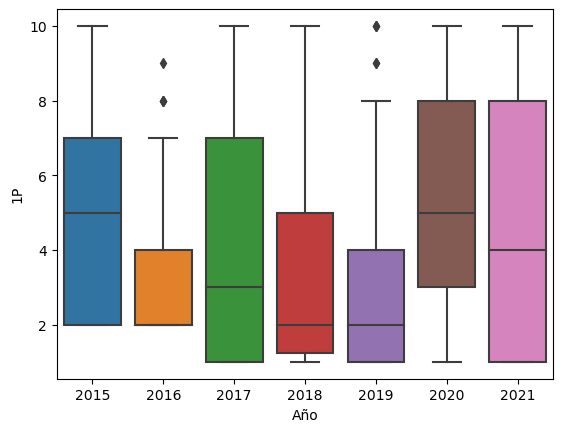

In [151]:
sns.boxplot(df, x='Año', y='1P')

Ahora le podemos agregar una segunda variable de agrupamiento (argumento hue), en este caso el Curso

<Axes: xlabel='Año', ylabel='1P'>

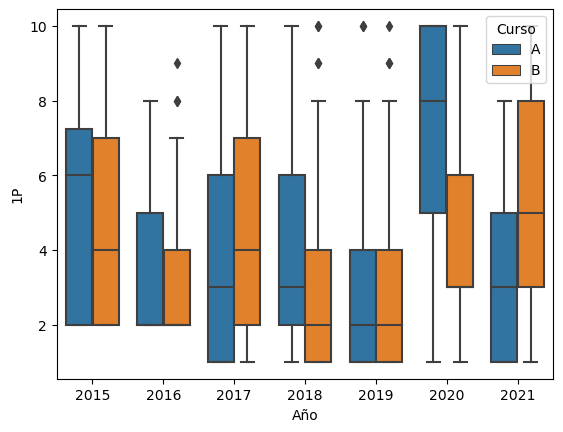

In [152]:
sns.boxplot(df, x='Año', y='1P', hue='Curso', width=0.75)

### Probemos con otros gráficos: Violin Plot

Otro tipo de gráfica interesante es la conocida como **Violin Plot**, que muestra la distribución de los datos junto a un boxplot en su interior

<Axes: xlabel='1P', ylabel='Curso'>

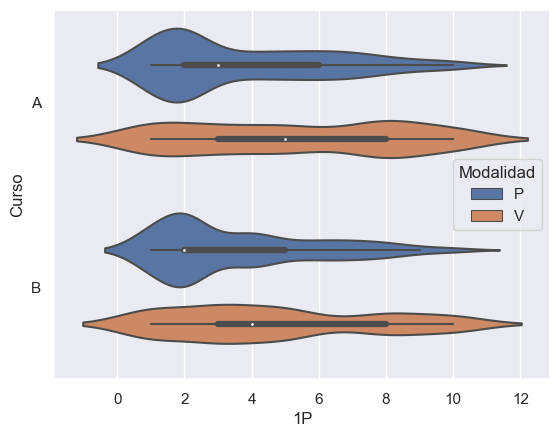

In [155]:
sns.set(style="darkgrid")
sns.violinplot(df, y='Curso', x='1P', hue='Modalidad')  # lo graficamos en horizontal

### Probemos con otros gráficos: Heat Map

El gráfico **Heat Map** permite crear mapas de calor o diagramas de correlaciones. Se le puede pasar un conjunto de datos 2D o un DataFrame de Pandas.

Vamos realizar las correlaciones entre varias variables utilizando el método de *Spearman* (para variables que no necesariamente siguen una distribución normal) y lo graficaremos en un mapa de calor.

<Axes: >

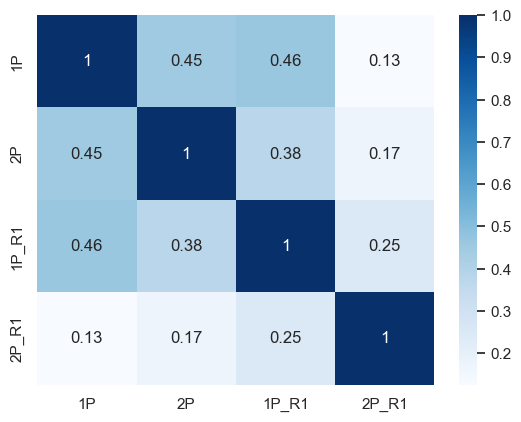

In [158]:
cols = ['1P', '2P', '1P_R1', '2P_R1']  # variables a correlacionar
corr = df[cols].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='Blues')

Para referencia, la interpretación de los coeficientes de correlación de Spearman es la siguiente:

<img src="./images/Interpretation-Table-of-Spearman-Rank-Order-Correlation-Coefficients.png" width=600px>